# Lexical Class Predictions based on features of ASL signs

## Setup code

In [222]:
import pandas as pd
from enum import Enum
import numpy as np
import matplotlib
from matplotlib import pylab as plt

## Import data

In [223]:

# folder = "asl-lex/Data Files/"
folder = '../data/'
figures_folder = '../figures/'
data_file = folder + "signdata.csv"
key_file = folder + "signdataKEY.csv"
encoding = "ISO-8859-1"

df = pd.read_csv(data_file, encoding=encoding)
df_key = pd.read_csv(key_file, encoding=encoding)

## Describe overall shape and features

In [224]:
# feature names
from functools import partial


def print_feature_descriptions(features=None):
    """Print the description of each given feature"""
    if features:
        feature_df = df_key[df_key.iloc[:, 0].isin(features)]
    else:
        feature_df = df_key

    for row in feature_df.itertuples():
        print(f"{row._1}: {row.VariableDefinition}")

def word_has_substring_in_list(word, a_list):
    for w in a_list:
        if w in word:
            return w
    return False

cat = 'categorical'
cont = 'continuous'
ord = 'ordinal'
boolean = 'boolean'
def find_feature_types(df, features, override_lists):
    """Assign each feature to a type automatically"""
    overrides = {ftr: key for key in override_lists.keys() for ftr in override_lists[key]}
    feature_types = {cat: [], cont: [], ord: [], boolean: []}
    for feature in features:
        # add feature to category automatically unless manually overwritten
        if ftr := word_has_substring_in_list(feature, overrides.keys()):
            feature_types[overrides[ftr]].append(feature)
        else:
            vc = df[feature].value_counts(dropna=False)
            vals = set(df[feature].unique())
            if vals == {0, 1}: # boolean
                feature_types[boolean].append(feature)
            elif all(isinstance(x, int) for x in vals) and len(vals) == max(vals): # ordinal
                print(vals)
                feature_types[ord].append(feature)
            elif len(vc) < 20 or len(df[feature].describe()) == 4: # categorical
                feature_types[cat].append(feature)
            else: # continuous
                feature_types[cont].append(feature)
    
    return feature_types


def visualize_feature_types(df, feature_types):
    """Visualize the distribution of the feature types based on its type"""
    print('###### CATEGORICAL ##############################################')
    for feature in feature_types[cat]:
        print(df[feature].value_counts(dropna=False))
        print()

    print('###### ORDINAL ##################################################')
    for feature in feature_types[ord]:
        print(df[feature].value_counts(dropna=False))
        print()
    
    print('###### BOOLEAN ###############################################')
    for feature in feature_types[boolean]:
        print(df[feature].value_counts(dropna=False))
        print()
    
    print('###### CONTINUOUS ###############################################')
    for feature in feature_types[cont]:
        print(df[feature].describe())
        print()



In [239]:
# num data points
print(f"there are {len(df)} data points")

# num features
print(f"there are {len(df.columns)} features")

all_features = ['EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item', 'EnglishWF(lg10)', 'SignFrequency(M)', 'SignFrequency(SD)', 'SignFrequency(Z)', 'SignFrequency(N)', 'Unknown', 'SignFrequency(M-Native)', 'SignFrequency(SD-Native)', 'SignFreq(Z-native)', 'SignFrequency(N-Native)', 'Unknown(Native)', 'SignFrequency(M-Nonnative)', 'SignFrequency(SD-Nonnative)', 'SignFrequency(N-Nonnative)', 'SignFreq(Z-Nonnative)', 'Unknown(Nonnative)', 'DominantTranslation', 'DominantTranslationAgreement', 'DominantTranslationAgreement(Native)', 'DominantTranslationAgreement(Nonnative)', 'NondominantTranslations', 'Iconicity(M)', 'Iconicity(SD)', 'Iconicity(Z)', 'Iconicity(N)', 'Iconicity_ID', 'IconicityType', 'D.Iconicity(M)', 'D.Iconicity(SD)', 'D.Iconicity(N)', 'D.Iconicity(Z)', 'D.Iconicity(M-native)', 'D.Iconicity(SD-native)', 'D.Iconicity(Z-native)', 'D.Iconicity(N-native)', 'GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'LexicalClass', 'Initialized.2.0', 'FingerspelledLoanSign.2.0', 'Compound.2.0', 'NumberOfMorphemes.2.0', 'SignOnset(ms)', 'SignOffset(ms)', 'SignDuration(ms)', 'ClipDuration(ms)', 'Handshape.2.0', 'MarkedHandshape.2.0', 'SelectedFingers.2.0', 'Flexion.2.0', 'FlexionChange.2.0', 'Spread.2.0', 'SpreadChange.2.0', 'ThumbPosition.2.0', 'ThumbContact.2.0', 'SignType.2.0', 'Movement.2.0', 'RepeatedMovement.2.0', 'MajorLocation.2.0', 'MinorLocation.2.0', 'SecondMinorLocation.2.0', 'Contact.2.0', 'NonDominantHandshape.2.0', 'UlnarRotation.2.0', 'HandshapeM2.2.0', 'MarkedHandshapeM2.2.0', 'SelectedFingersM2.2.0', 'FlexionM2.2.0', 'FlexionChangeM2.2.0', 'SpreadM2.2.0', 'SpreadChangeM2.2.0', 'ThumbPositionM2.2.0', 'ThumbContactM2.2.0', 'SignTypeM2.2.0', 'MovementM2.2.0', 'RepeatedMovementM2.2.0', 'MajorLocationM2.2.0', 'MinorLocationM2.2.0', 'SecondMinorLocationM2.2.0', 'ContactM2.2.0', 'NonDominantHandshapeM2.2.0', 'UlnarRotationM2.2.0', 'HandshapeM3.2.0', 'MarkedHandshapeM3.2.0', 'SelectedFingersM3.2.0', 'FlexionM3.2.0', 'FlexionChangeM3.2.0', 'SpreadM3.2.0', 'SpreadChangeM3.2.0', 'ThumbPositionM3.2.0', 'ThumbContactM3.2.0', 'SignTypeM3.2.0', 'MovementM3.2.0', 'RepeatedMovementM3.2.0', 'MajorLocationM3.2.0', 'MinorLocationM3.2.0', 'SecondMinorLocationM3.2.0', 'ContactM3.2.0', 'NonDominantHandshapeM3.2.0', 'UlnarRotationM3.2.0', 'HandshapeM4.2.0', 'MarkedHandshapeM4.2.0', 'SelectedFingersM4.2.0', 'FlexionM4.2.0', 'FlexionChangeM4.2.0', 'SpreadM4.2.0', 'SpreadChangeM4.2.0', 'ThumbPositionM4.2.0', 'ThumbContactM4.2.0', 'SignTypeM4.2.0', 'MovementM4.2.0', 'RepeatedMovementM4.2.0', 'MajorLocationM4.2.0', 'MinorLocationM4.2.0', 'SecondMinorLocationM4.2.0', 'ContactM4.2.0', 'NonDominantHandshapeM4.2.0', 'UlnarRotationM4.2.0', 'HandshapeM5.2.0', 'MarkedHandshapeM5.2.0', 'SelectedFingersM5.2.0', 'FlexionM5.2.0', 'FlexionChangeM5.2.0', 'SpreadM5.2.0', 'SpreadChangeM5.2.0', 'ThumbPositionM5.2.0', 'ThumbContactM5.2.0', 'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0', 'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0', 'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0', 'HandshapeM6.2.0', 'MarkedHandshapeM6.2.0', 'SelectedFingersM6.2.0', 'FlexionM6.2.0', 'FlexionChangeM6.2.0', 'SpreadM6.2.0', 'SpreadChangeM6.2.0', 'ThumbPositionM6.2.0', 'ThumbContactM6.2.0', 'SignTypeM6.2.0', 'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0', 'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0', 'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0', 'SignType.2.0Frequency', 'MajorLocation.2.0Frequency', 'MinorLocation.2.0Frequency', 'SecondMinorLocation.2.0Frequency', 'Movement.2.0Frequency', 'SelectedFingers.2.0Frequency', 'Flexion.2.0Frequency', 'FlexionChange.2.0Frequency', 'RepeatedMovement.2.0Frequency', 'Contact.2.0Frequency', 'Spread.2.0Frequency', 'SpreadChange.2.0Frequency', 'ThumbContact.2.0Frequency', 'ThumbPosition.2.0Frequency', 'UlnarRotation.2.0Frequency', 'Neighborhood Density 2.0', 'Parameter.Neighborhood.Density.2.0', 'PhonotacticProbability', 'Phonological Complexity', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField', 'SignBankReferenceID', 'InCDI', 'CDISemanticCategory', 'bglm_aoa', 'empirical_aoa']
to_drop = [
    'EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item', 'M3', 'M4', 'M5', 'M6', '2.0Frequency', 'ID'
]
features = [ftr for ftr in all_features if not word_has_substring_in_list(ftr, to_drop)]

override_lists = {
    cat: [],
    cont: [
        'SignFrequency',
        'D.Iconicity',
    ],
    ord: [
        'NumberOfMorphemes',
        'Phonological Complexity'
    ]
}
feature_types = find_feature_types(df, features, override_lists)

print('\nfeature type counts:')
print({k: len(v) for k, v in feature_types.items()})

# # uncomment to show values or descriptions of each features distribution based on feature type
# visualize_feature_types(df, feature_types)


there are 2723 data points
there are 191 features

feature type counts:
{'categorical': 40, 'continuous': 45, 'ordinal': 2, 'boolean': 7}


## EDA

benchmark accuracy: Noun         0.470567
Verb         0.332965
Adjective    0.110375
Minor        0.043414
Adverb       0.018396
Name         0.015453
Number       0.008830
Name: LexicalClass, dtype: float64


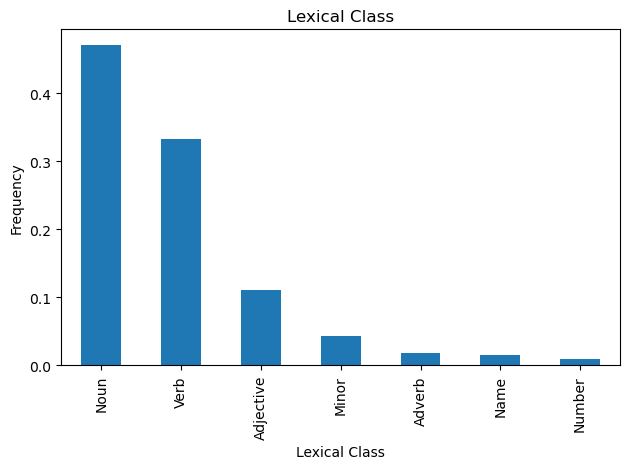

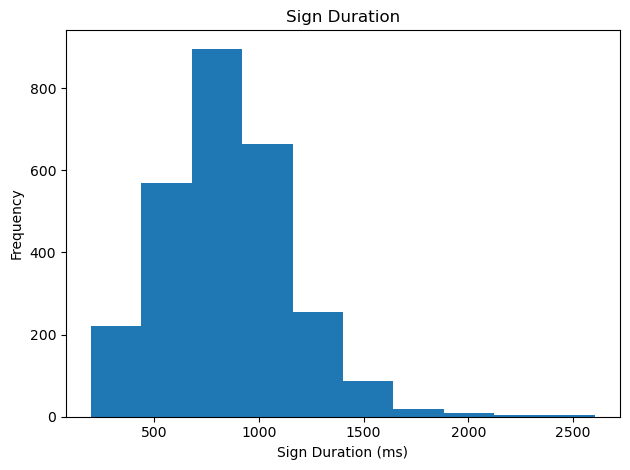

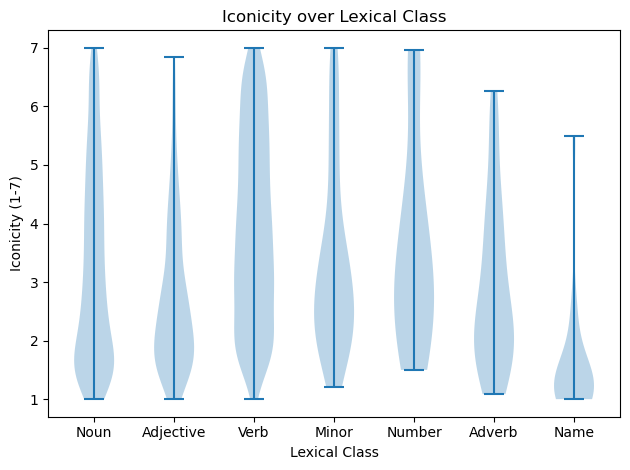

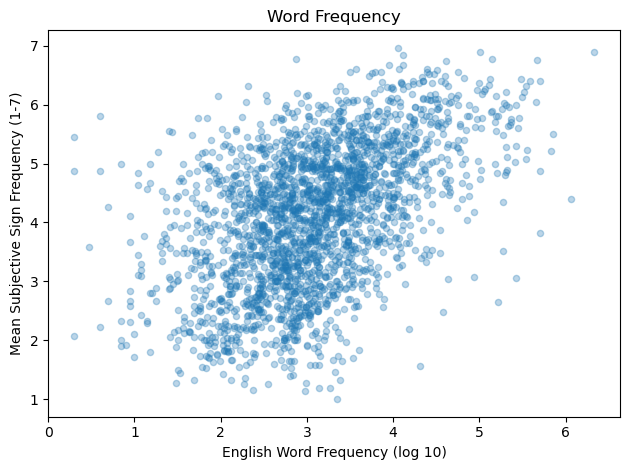

In [234]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) # to make saved figures not cut off

class Graph(Enum):
    SCATTER = 0
    DESCRIBE = 1
    VALUE_CNTS = 2
    BAR = 4
    HISTOGRAM = 5
    VIOLIN = 6
    

def set_labels(title=None, xlabel=None, ylabel=None):
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    

def visualize(x_feature, graph=Graph.VALUE_CNTS, y_feature=None, title=None, xlabel=None, ylabel=None, normalize=True):
    values = df[x_feature]
    match graph:
        case Graph.VALUE_CNTS:
            print(values.value_counts())
        case Graph.DESCRIBE:
            print(values.describe())
        case Graph.BAR:
            values.value_counts(normalize=normalize).plot.bar()
        case Graph.HISTOGRAM:
            values.plot.hist()
        case Graph.SCATTER:
            df.plot.scatter(x_feature, y_feature, alpha=0.3)
        case Graph.VIOLIN:
            categories = [c for c in df[x_feature].unique() if str(c) != 'nan']
            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].values
                dataset.append(vals)

            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].dropna().values
                dataset.append(vals)

            plt.violinplot(dataset = dataset)

            plt.xticks(range(1, len(categories) + 1), categories)
        case _:
            print("Graph type not found")

    set_labels(title, xlabel, ylabel)
    if title:
        plt.savefig(figures_folder + title.replace(' ', ''))
    plt.show()

print('benchmark accuracy:', df['LexicalClass'].value_counts(True))
visualize('LexicalClass', Graph.BAR, title="Lexical Class", xlabel="Lexical Class", ylabel="Frequency")
visualize('SignDuration(ms)', Graph.HISTOGRAM, title="Sign Duration", xlabel="Sign Duration (ms)", ylabel="Frequency")
visualize('LexicalClass', Graph.VIOLIN, y_feature='Iconicity(M)', title="Iconicity over Lexical Class", xlabel="Lexical Class", ylabel="Iconicity (1-7)")
visualize('EnglishWF(lg10)', Graph.SCATTER, y_feature='SignFrequency(M)', title="Word Frequency", xlabel="English Word Frequency (log 10)", ylabel="Mean Subjective Sign Frequency (1-7)")


## Split

In [227]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

df_pre = df[features].dropna(subset='LexicalClass')
# df_pre = df['SelectedFingers.2.0']
# print(df_pre.columns)

# let's separate the feature matrix X, and target variable y
y = df_pre['LexicalClass'] # remember, we want to predict who earns more than 50k or less than 50k
X = df_pre.loc[:, df_pre.columns != 'LexicalClass'] # all other columns are features

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state,stratify=y)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state,stratify=y_other)

## Preprocessing

In [229]:
onehot_ftrs = [ftr for ftr in feature_types[cat] if ftr != 'LexicalClass']
std_ftrs = feature_types[cont]

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ],
    remainder="passthrough"
)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(len(df_pre['SelectedFingers.2.0'].unique()))


(1630, 93)
(1630, 2274)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 2.]
 [0. 0. 0. ... 1. 0. 3.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 3.]]
12
